In [ ]:
import pandas as pd
import seaborn as sb
import numpy as np

In [ ]:
df = pd.read_csv('FakeNews_Influencers_Nov09.csv')
df

,user_id,followers_count,following_count,status_count,created_at,favorites_count,verified,active_years,status_follower_ratio,followers_following_ratio
0,965662700457033728,22,4,5140,Mon Feb 19 19:01:43 +0000 2018,0,False,2,233.636364,5.500000
1,18000449,244,341,74854,Tue Dec 09 19:56:33 +0000 2008,5605,False,12,306.778689,0.715543
2,2736948289,50,362,140,Sat Aug 16 09:59:12 +0000 2014,367,False,6,2.800000,0.138122
3,708353900961603584,425,353,14438,Fri Mar 11 18:08:25 +0000 2016,17678,False,4,33.971765,1.203966
4,187021634,269,1112,10360,Sun Sep 05 01:40:44 +0000 2010,6515,False,10,38.513011,0.241906
...,...,...,...,...,...,...,...,...,...,...
42903,728280729457557504,5961,599,6927,Thu May 05 17:50:31 +0000 2016,1503,False,4,1.162053,9.951586
42904,40379244,1828,601,197604,Sat May 16 01:19:01 +0000 2009,1102,False,11,108.098468,3.041597
42905,2357114090,1257,1942,19969,Sat Feb 22 23:44:55 +0000 2014,4034,False,6,15.886237,0.647271
42906,4533292933,4560,4881,91900,Sat Dec 12 00:47:43 +0000 2015,44886,False,5,20.153509,0.934235


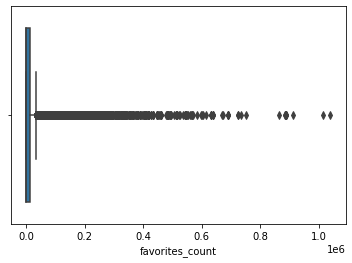

In [ ]:
ax = sb.boxplot(x=df["favorites_count"])

### Favorites Count

In [ ]:
np.max(df['favorites_count'])

1039102

In [ ]:
np.min(df['favorites_count'])

0

In [ ]:
np.mean(df['favorites_count'])

18800.944812156242

In [ ]:
np.median(df['favorites_count'])

1556.0

In [ ]:
from scipy.stats import mode
mode(df['favorites_count'])[0][0]

0

In [ ]:
print("Q2 quantile of arr : ", np.quantile(df['favorites_count'], .50)) 
print("Q1 quantile of arr : ", np.quantile(df['favorites_count'], .25)) 
print("Q3 quantile of arr : ", np.quantile(df['favorites_count'], .75)) 

Q2 quantile of arr :  1556.0
Q1 quantile of arr :  52.0
Q3 quantile of arr :  13167.0


### Active Years

In [ ]:
np.max(df['active_years'])

14

In [ ]:
np.min(df['active_years'])

2

In [ ]:
np.mean(df['active_years'])

7.462967278829122

In [ ]:
np.median(df['active_years'])

8.0

In [ ]:
mode(df['active_years'])[0][0]

11

In [ ]:
print("Q2 quantile of arr : ", np.quantile(df['active_years'], .50)) 
print("Q1 quantile of arr : ", np.quantile(df['active_years'], .25)) 
print("Q3 quantile of arr : ", np.quantile(df['active_years'], .75)) 

Q2 quantile of arr :  8.0
Q1 quantile of arr :  5.0
Q3 quantile of arr :  10.0


### followers_following_ratio

In [ ]:
np.max(df['followers_following_ratio'])

15108690.0

In [ ]:
np.min(df['followers_following_ratio'])

0.0

In [ ]:
np.mean(df['followers_following_ratio'])

608.5221076913024

In [ ]:
np.median(df['followers_following_ratio'])

0.7782726351806069

In [ ]:
mode(df['followers_following_ratio'])[0][0]

0.0

In [ ]:
print("Q2 quantile of arr : ", np.quantile(df['followers_following_ratio'], .50)) 
print("Q1 quantile of arr : ", np.quantile(df['followers_following_ratio'], .25)) 
print("Q3 quantile of arr : ", np.quantile(df['followers_following_ratio'], .75)) 

Q2 quantile of arr :  0.7782726351806069
Q1 quantile of arr :  0.3343065693430657
Q3 quantile of arr :  1.402943613695431


### status_follower_ratio

In [ ]:
np.max(df['status_follower_ratio'])

In [ ]:
np.min(df['status_follower_ratio'])

In [ ]:
np.mean(df['status_follower_ratio'])

In [ ]:
np.median(df['status_follower_ratio'])

In [ ]:
mode(df['status_follower_ratio'])[0][0]

In [ ]:
print("Q2 quantile of arr : ", np.quantile(df['status_follower_ratio'], .50)) 
print("Q1 quantile of arr : ", np.quantile(df['status_follower_ratio'], .25)) 
print("Q3 quantile of arr : ", np.quantile(df['status_follower_ratio'], .75)) 

### Calculating final score/weights

In [ ]:
def verified_score(df):
    if(df['verified'] == True):
        df['verified_score'] = 0.30
    else:
        df['verified_score'] = 0.00
    
    if(df['active_years'] >= 0 and df['active_years'] <= 5.0):
        df['active_year_score'] = 0.05
    elif(df['active_years'] > 5.0 and df['active_years'] <= 8.0):
        df['active_year_score'] = 0.1
    elif(df['active_years'] > 8.0 and df['active_years'] <= 10.0):
        df['active_year_score'] = 0.15
    else:
        df['active_year_score'] = 0.2
        
    if(df['followers_following_ratio'] >= 0 and df['followers_following_ratio'] <= 0.3343065693430657):
        df['ff_score'] = 0.05
    elif(df['followers_following_ratio'] > 0.3343065693430657 and df['followers_following_ratio'] <= 0.7782726351806069):
        df['ff_score'] = 0.1
    elif(df['followers_following_ratio'] > 0.7782726351806069 and df['followers_following_ratio'] <= 1.402943613695431):
        df['ff_score'] = 0.15
    else:
        df['ff_score'] = 0.2
        
    if(df['favorites_count'] >= 0 and df['favorites_count'] <= 52.0):
        df['favorites_count_score'] = 0.025
    elif(df['favorites_count'] > 52.0 and df['favorites_count'] <= 1556.0):
        df['favorites_count_score'] = 0.05
    elif(df['favorites_count'] > 1556.0 and df['favorites_count'] <= 13167.0):
        df['favorites_count_score'] = 0.075
    else:
        df['favorites_count_score'] = 0.1
        
    if(df['status_follower_ratio'] >= 0 and df['status_follower_ratio'] <= 8.682433578616784):
        df['sf_score'] = 0.05
    elif(df['status_follower_ratio'] > 8.682433578616784 and df['status_follower_ratio'] <= 31.918177480055277):
        df['sf_score'] = 0.1
    elif(df['status_follower_ratio'] > 31.918177480055277 and df['status_follower_ratio'] <= 117.325):
        df['sf_score'] = 0.15
    else:
        df['sf_score'] = 0.2
        
    df['weights'] = df['verified_score'] + df['active_year_score'] + df['ff_score'] +  df['favorites_count_score'] + df['sf_score']
    return df

In [ ]:
df_final = df.apply(verified_score,axis=1)
df_final

,user_id,followers_count,following_count,status_count,created_at,favorites_count,verified,active_years,status_follower_ratio,followers_following_ratio,verified_score,active_year_score,ff_score,favorites_count_score,sf_score,weights
0,965662700457033728,22,4,5140,Mon Feb 19 19:01:43 +0000 2018,0,False,2,233.636364,5.500000,0.0,0.05,0.20,0.05,0.20,0.50
1,18000449,244,341,74854,Tue Dec 09 19:56:33 +0000 2008,5605,False,12,306.778689,0.715543,0.0,0.20,0.10,0.15,0.20,0.65
2,2736948289,50,362,140,Sat Aug 16 09:59:12 +0000 2014,367,False,6,2.800000,0.138122,0.0,0.10,0.05,0.10,0.05,0.30
3,708353900961603584,425,353,14438,Fri Mar 11 18:08:25 +0000 2016,17678,False,4,33.971765,1.203966,0.0,0.05,0.15,0.20,0.15,0.55
4,187021634,269,1112,10360,Sun Sep 05 01:40:44 +0000 2010,6515,False,10,38.513011,0.241906,0.0,0.15,0.05,0.15,0.15,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42903,728280729457557504,5961,599,6927,Thu May 05 17:50:31 +0000 2016,1503,False,4,1.162053,9.951586,0.0,0.05,0.20,0.10,0.05,0.40
42904,40379244,1828,601,197604,Sat May 16 01:19:01 +0000 2009,1102,False,11,108.098468,3.041597,0.0,0.20,0.20,0.10,0.15,0.65
42905,2357114090,1257,1942,19969,Sat Feb 22 23:44:55 +0000 2014,4034,False,6,15.886237,0.647271,0.0,0.10,0.10,0.15,0.10,0.45
42906,4533292933,4560,4881,91900,Sat Dec 12 00:47:43 +0000 2015,44886,False,5,20.153509,0.934235,0.0,0.05,0.15,0.20,0.10,0.50


In [ ]:
df_final.to_csv('FakeNews_Weights_Nov09.csv',index=False)

In [ ]:
df_final.columns

Index(['user_id', 'followers_count', 'following_count', 'status_count',
       'created_at', 'favorites_count', 'verified', 'active_years',
       'status_follower_ratio', 'followers_following_ratio', 'verified_score',
       'active_year_score', 'ff_score', 'favorites_count_score', 'sf_score',
       'weights'],
      dtype='object')

In [ ]:
df_final = df_final.drop(['followers_count', 'following_count', 'status_count',
       'created_at', 'favorites_count', 'verified', 'active_years',
       'status_follower_ratio', 'followers_following_ratio', 'verified_score',
       'active_year_score', 'ff_score', 'favorites_count_score', 'sf_score'],axis=1)

In [ ]:
df_final

,user_id,weights
0,965662700457033728,0.50
1,18000449,0.65
2,2736948289,0.30
3,708353900961603584,0.55
4,187021634,0.50
...,...,...
42903,728280729457557504,0.40
42904,40379244,0.65
42905,2357114090,0.45
42906,4533292933,0.50


In [ ]:
df_final.to_csv('FakeNews_final_weights_Nov09.csv',index=False)